# Sketchpad

Various experiments with ideology graphs.

In [2]:
# imports and includes
using LightGraphs, MetaGraphs, SNAPDatasets, Random, GraphPlot, Compose, Plots
include("../src/models.jl")   # Graph models
include("../src/dynamics.jl") # Dynamical systems
include("../src/dataviz.jl")  # Plotting for our graphs

drawcolorgraph (generic function with 1 method)

## Simple ideology graphs

Here we do the simple experiments. No quality attribute, 1- and 2-D ideology attributes, various graph generation models. No "media accounts."

### Erdos-Renyi models with a few different parameters. Small models.

In [ ]:
model = ermodel(20, 0.3, IGraph)
assignid!(model)
colornet!(model)
drawcolorgraph(model)

In [ ]:
model = ermodel(50, 0.15, IGraph)
assignid!(model)
colornet!(model)
drawcolorgraph(model)

### Erdos-Renyi model with media accounts added

In [ ]:

Back To Specials
model = ermodel(30, 0.2, IGraph)
assignid!(model)
addmedia_rand!(model, 2, 6, 0.5)
colornet!(model)
drawcolorgraph(model)

In [ ]:
model = wsmodel(50, 4, 0.3, IGraph)
assignid!(model)
addmedia_nearest!(model, 2, 5, [-0.9, 0.9])
colornet!(model)
drawcolorgraph(model)

## Simple dynamical experiments

In a simple ER model all but the most extreme accounts homogenize to a fairly neutral ideology. In sufficiently connected graphs, or with a large enough acceptance parameter, all accounts will generally homogenize.

In [ ]:
model = ermodel(20, 0.3, IGraph)
assignid!(model)
ids, steps = fullsim!(model, 0.5)


In [ ]:
transpose(ids)[:,1]

In [ ]:
plot(1:size(ids)[2],transpose(ids))

In [ ]:
colornet!(model)
drawcolorgraph(model)

In [ ]:
model = ermodel(60, 0.1, IGraph)
assignid!(model)
ids, steps = fullsim!(model, 0.9)
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, :], xlims=(1, size(ids)[2]))
end

In [ ]:
colornet!(model)
drawcolorgraph(model)

In the presence of a media account, many accounts will become "entrained" to the media account. A handful of accounts may retain different ideology.

In [ ]:
model = ermodel(120, 0.1, IGraph)
assignid!(model)
addmedia_nearest!(model, 1, 12, [0.8])
addmedia_nearest!(model, 1, 12, [-0.8])
ids, steps = fullsim!(model, 0.5)
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, :], xlims=(1, size(ids)[2]), legend = nothing)
end

In [ ]:
model = ermodel(120, 0.1, IGraph)
assignid!(model)
addmedia_rand!(model, 1, 12, 0.8)
addmedia_rand!(model, 1, 12, -0.8)
ids, steps = fullsim!(model, 0.5)
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, :], xlims=(1, size(ids)[2]), legend = nothing)
end

In [ ]:
model = wsmodel(100, 8, 0.5, IGraph)
assignid!(model)
addmedia_nearest!(model, 1, 12, [0.8])
addmedia_nearest!(model, 1, 12, [-0.8])
ids, steps = fullsim!(model, 0.5, 10^(-4), 1000)
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, :], xlims=(1, size(ids)[2]))
end

In [ ]:
model = wsmodel(100, 8, 0.5, IGraph)
assignid!(model)
addmedia_rand!(model, 2, 12, 0.6)
addmedia_rand!(model, 2, 12, -0.6)
ids, steps = fullsim!(model, 0.5, 10^(-4), 1000)
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, :], xlims=(1, size(ids)[2]))
end

In [3]:
model = SNAPIdeog(:ego_twitter_u, IGraph)
assignid!(model)
addmedia_nearest!(model, 10, 1000, [0.3, 0.3, 0.3, 0.5, 0.5, 0.5, 0.5, 0.7, 0.7, 0.7])
addmedia_nearest!(model, 10, 1000, [-0.3, -0.3, -0.3, -0.5, -0.5, -0.5, -0.5, -0.7, -0.7, -0.7])

true

In [4]:
ids, steps = fullsim!(model, 0.5, 10^(-4), 300)

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265266267268269270271272273274275276277278279280281282283284285286287288289290291292293294295296297298299300

([-0.8282537574102772 -0.6539487708519248 … 0.013807041077371908 0.013838983634570146; -0.3690502545937569 -0.3736447746020666 … 0.013915855777291193 0.013947944249519915; … ; -0.7 -0.7000098295427055 … -0.5296990661004817 -0.5296940640691726; -0.7 -0.7000098295427055 … -0.5296990661004817 -0.5296940640691726], 300)

In [ ]:
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, :], xlims=(1, size(ids)[2]))
end

┌ Info: Saved animation to 
│   fn = /home/dylan/code/IdeologyGraphs/notebooks/tmp.gif
└ @ Plots /home/dylan/.julia/packages/Plots/WwFyB/src/animation.jl:98


Plots.AnimatedGif("/home/dylan/code/IdeologyGraphs/notebooks/tmp.gif")
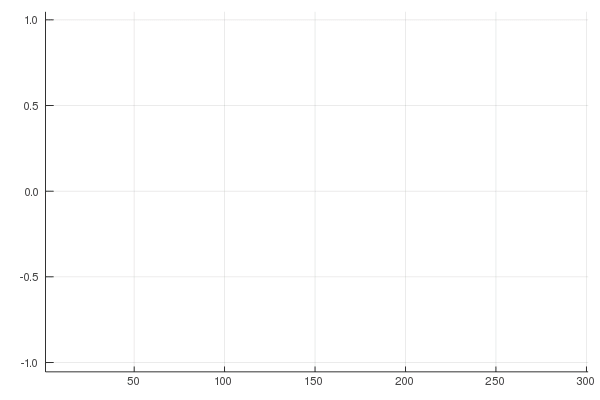

In [ ]:
verts = random_verts(model.g, 500)
@gif for i=1:size(ids)[2]
    plot(1:i,transpose(ids)[1:i, verts], xlims=(1, size(ids)[2]), legend = nothing)
end